In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import abspath
import subprocess
from frontend.rust.collect_fuzz import get_target_list

In [2]:
with open("failed_repos.txt", "r") as f:
    failed_repos = f.read().splitlines()

repos = []
for repo_path in failed_repos:
    subdirectories = [
        os.path.join(repo_path, d)
        for d in os.listdir(repo_path)
        if os.path.isdir(os.path.join(repo_path, d))
    ]
    repos.append(abspath(subdirectories[0]))

len(repos)

40

In [3]:
repos[0]

'/home/yfhe/UniTSyncer/data/rust_repos/orlp-glidesort/orlp-glidesort-c4df951'

In [4]:

def check_fuzz_targets(repo_path):
    try:
        p = subprocess.run(
            ["cargo", "fuzz", "list"],
            cwd=repo_path,
            stderr=subprocess.DEVNULL,
            stdout=subprocess.PIPE,
            check=True,
        )
    except subprocess.CalledProcessError as e:
        return "list failed"

    targets = p.stdout.decode("utf-8").splitlines()
    print(targets)
    if len(targets) == 0:
        return "no"
    if len(targets) == 1 and targets[0] == "fuzz_target_1":
        return "empty"
    return None


def get_reason(repo_path):
    try:
        subprocess.run(
            ["cargo", "fuzz", "build"],
            cwd=repo_path,
            stderr=subprocess.PIPE,
            stdout=subprocess.PIPE,
            check=True,
        )
    except subprocess.CalledProcessError as e:
        stderr = e.stderr.decode("utf-8")
        if "data" in stderr:
            return "build failed due to data"
        else:
            return "cannot compile"

    return check_fuzz_targets(repo_path)

In [5]:
reasons = [str(get_reason(repo)) for repo in repos]

['parse_token_stream']
['ether', 'gre', 'ipv4', 'tcp', 'udp', 'vlan']


In [6]:
len(reasons)

40

<BarContainer object of 3 artists>

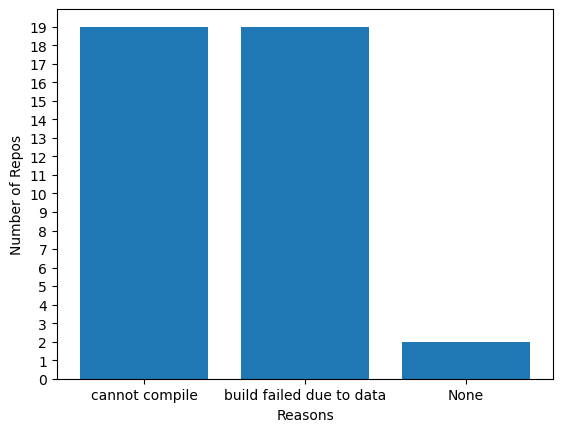

In [7]:
unique_reasons = list( set(reasons))
counts = [reasons.count(reason) for reason in unique_reasons]
plt.yticks(list(range(max(counts)+1)))
plt.ylabel("Number of Repos")
plt.xlabel("Reasons")
plt.bar(unique_reasons, counts)

In [8]:
counts

[19, 19, 2]